<a href="https://colab.research.google.com/github/Ifeeding99/tensorflow-scripts/blob/main/tensorflow_with_unbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
path = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
len(df[df['Class'] == 0])

284315

In [ ]:
len(df[df['Class'] == 1])

492

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

n_pos = len(df[df['Class'] == 1])
n_neg = len(df[df['Class'] == 0])
tot = len(df)
df.pop('Time')
y = df.pop('Class')
df['Amount'] = np.log(df['Amount']+0.00001)
X_train, X_test, y_train, y_test = train_test_split(df, y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
bias_init = n_pos/tot
class_1_weight = tot/n_pos
class_0_weight = tot/n_neg
class_weights = {0:class_0_weight, 1:class_1_weight}
bias_initializer = tf.keras.initializers.Constant(bias_init)

In [ ]:
stop = tf.keras.callbacks.EarlyStopping(monitor='val_prc', min_delta = 0.01, patience = 10, restore_best_weights = True)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential([
    Dense(16, input_shape =( X_train.shape[1],)),
    Activation(tf.nn.relu),
    Dropout(0.5),
    Dense(1, bias_initializer = bias_initializer),
    Activation(tf.nn.sigmoid)
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.Recall(name = 'recall'),
                         tf.keras.metrics.AUC(name = 'prc', curve = 'PR'),
                         tf.keras.metrics.Precision(name = 'precision')])

model.fit(X_train, y_train,
          validation_split = 0.2,
          batch_size = 32,
          epochs = 50,
          callbacks = [stop],
          class_weight = class_weights)

Epoch 1/50
5341/5341 [==============================] - 31s 5ms/step - loss: 0.9938 - recall: 0.8065 - prc: 0.4052 - precision: 0.0094 - val_loss: 0.1805 - val_recall: 0.8507 - val_prc: 0.6642 - val_precision: 0.0596
Epoch 2/50
5341/5341 [==============================] - 27s 5ms/step - loss: 0.5353 - recall: 0.8581 - prc: 0.5262 - precision: 0.0282 - val_loss: 0.1109 - val_recall: 0.8657 - val_prc: 0.6422 - val_precision: 0.0853
Epoch 3/50
5341/5341 [==============================] - 29s 5ms/step - loss: 0.5156 - recall: 0.8516 - prc: 0.5670 - precision: 0.0414 - val_loss: 0.1046 - val_recall: 0.8657 - val_prc: 0.6715 - val_precision: 0.1038
Epoch 4/50
5341/5341 [==============================] - 28s 5ms/step - loss: 0.4698 - recall: 0.8742 - prc: 0.5949 - precision: 0.0476 - val_loss: 0.0896 - val_recall: 0.8806 - val_prc: 0.6935 - val_precision: 0.0939
Epoch 5/50
5341/5341 [==============================] - 27s 5ms/step - loss: 0.3576 - recall: 0.9000 - prc: 0.6006 - precision: 0.05

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
def convert(a):
  for i,el in enumerate(a):
    if a[i] >= 0.5:
      a[i] = 1
    else:
      a[i] = 0
  return a

y_pred = convert(y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

2226/2226 [==============================] - 4s 2ms/step


array([[69898,  1189],
       [    9,   106]])

In [ ]:
model.evaluate(X_test, y_test)

2226/2226 [==============================] - 13s 5ms/step - loss: 0.0742 - recall: 0.9217 - prc: 0.6592 - precision: 0.0819


[0.07415536791086197,
 0.9217391014099121,
 0.6591988801956177,
 0.08185328543186188]

In [ ]:
y_test = np.array(y_test)
y_test[71000]

0

In [ ]:
for el in y_pred:
  if el == 1:
    print('Trovato')

<AxesSubplot:>

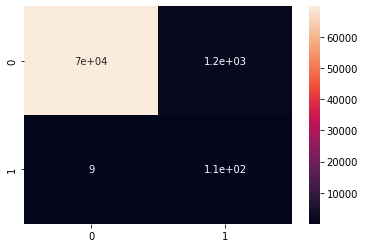

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot = True)

6676/6676 [==============================] - 12s 2ms/step


<AxesSubplot:>

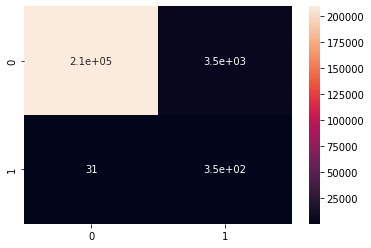

In [ ]:
cm_2 = confusion_matrix(y_train, convert(model.predict(X_train)))
sns.heatmap(cm_2, annot = True)